# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [43]:
DATA_FOLDER = '../../ADA2017-Tutorials/02 - Intro to Pandas/Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [44]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.
import glob

We start by creating a frame per country containing all the data from the corresponding files.

In [45]:
def folder_to_dataframe(folder):
    return pd.concat(map(pd.read_csv, glob.glob(DATA_FOLDER + folder + '/*.csv')))

frameSL, frameLI, frameGU = list(map(folder_to_dataframe, ('/ebola/sl_data/', '/ebola/liberia_data/', '/ebola/guinea_data/')))

In order to understand the data we have to work with, we display a summary for each data frame.

In [46]:
frameSL.head()

,34 Military Hospital,Bo,Bo EMC,Bombali,Bonthe,Hastings-F/Town,Kailahun,Kambia,Kenema,Kenema (IFRC),...,Port Loko,Pujehun,Tonkolili,Unnamed: 18,Western area,Western area combined,Western area rural,Western area urban,date,variable
0,NaN,654142,NaN,494139,168729,NaN,465048,341690,653013,NaN,...,557978,335574,434937,NaN,NaN,NaN,263619,1040888,2014-08-12,population
1,NaN,0,NaN,0,0,NaN,0,0,3,NaN,...,1,0,0,NaN,NaN,NaN,0,0,2014-08-12,new_noncase
2,NaN,1,NaN,0,0,NaN,0,0,9,NaN,...,0,0,0,NaN,NaN,NaN,0,0,2014-08-12,new_suspected
3,NaN,1,NaN,0,0,NaN,0,0,0,NaN,...,0,0,0,NaN,NaN,NaN,0,0,2014-08-12,new_probable
4,NaN,0,NaN,0,0,NaN,0,0,9,NaN,...,2,0,0,NaN,NaN,NaN,0,0,2014-08-12,new_confirmed


In [47]:
frameLI.head()

,Bomi County,Bong County,Date,Gbarpolu County,Grand Bassa,Grand Cape Mount,Grand Gedeh,Grand Kru,Lofa County,Margibi County,Maryland County,Montserrado County,National,Nimba County,River Gee County,RiverCess County,Sinoe County,Unnamed: 18,Variable
0,NaN,NaN,6/16/2014,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,Specimens collected
1,NaN,NaN,6/16/2014,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Specimens pending for testing
2,NaN,NaN,6/16/2014,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,7.0,28.0,NaN,NaN,NaN,NaN,NaN,Total specimens tested
3,NaN,NaN,6/16/2014,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,2.0,NaN,NaN,NaN,NaN,NaN,Newly reported deaths
4,NaN,NaN,6/16/2014,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,0.0,8.0,NaN,NaN,NaN,NaN,NaN,Total death/s in confirmed cases


In [48]:
frameGU.head()

,Beyla,Boffa,Conakry,Coyah,Dabola,Dalaba,Date,Description,Dinguiraye,Dubreka,...,Kouroussa,Lola,Macenta,Mzerekore,Nzerekore,Pita,Siguiri,Telimele,Totals,Yomou
0,NaN,0,5,NaN,0,NaN,2014-08-04,New cases of suspects,0,0,...,0,NaN,0,NaN,0,0,0,0,5,NaN
1,NaN,0,0,NaN,0,NaN,2014-08-04,New cases of probables,0,0,...,0,NaN,0,NaN,0,0,0,0,0,NaN
2,NaN,0,1,NaN,0,NaN,2014-08-04,New cases of confirmed,0,0,...,0,NaN,0,NaN,0,0,0,0,4,NaN
3,NaN,0,6,NaN,0,NaN,2014-08-04,Total new cases registered so far,0,0,...,0,NaN,0,NaN,0,0,0,0,9,NaN
4,NaN,0,9,NaN,0,NaN,2014-08-04,Total cases of suspects,0,0,...,0,NaN,0,NaN,0,0,0,0,11,NaN


We notice that the names of columns identifying dates/Dates, Description/Variable and National/Totals are not unified accross the three dataframes so we change that to have the same identifiers. We also notice that the date format in the dataset for Liberia does not correspond to the one used in the other datasets.

In [49]:
frameSL.rename(columns={'date':'Date', 'variable':'Variable'}, inplace=True) #unifying column names
frameLI['Date'] = pd.to_datetime(frameLI.Date) #unifying the date format
frameSL['Date'] = pd.to_datetime(frameSL.Date) #unifying the date format
frameGU['Date'] = pd.to_datetime(frameGU.Date) #unifying the date format
frameGU.rename(columns={'Totals':'National','Description':'Variable' }, inplace=True) #unifying column names

We keep only the columns relevant for our computation, these are the Date because we want to compute a monthly average of daily new cases and deaths, so we must be able to differentiate different days and months. We keep the Variable because we will need it to identify the rows relevant to new cases and new deaths. We keep the National columns because we are interested by values per country so we don't need to know the details per region specifically but just nation wide.

In [50]:
frameGU = frameGU[['Date', 'Variable', 'National']] #we keep only the relevant columns needed for our final computation
frameSL = frameSL[['Date', 'Variable', 'National']] 
frameLI = frameLI[['Date', 'Variable', 'National']] 

Let us now observe the Variable values to decide which one are relevant for our computation.

2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 

In [51]:
frameSL.Variable.unique()

array(['population', 'new_noncase', 'new_suspected', 'new_probable',
       'new_confirmed', 'cum_noncase', 'cum_suspected', 'cum_probable',
       'cum_confirmed', 'death_suspected', 'death_probable',
       'death_confirmed', 'cfr', 'etc_new_admission',
       'etc_currently_admitted', 'etc_cum_admission', 'etc_new_deaths',
       'etc_cum_deaths', 'etc_new_discharges', 'etc_cum_discharges',
       'cum_contacts', 'cum_completed_contacts', 'contacts_followed',
       'new_contacts', 'contacts_healthy', 'contacts_ill',
       'contacts_not_seen', 'new_completed_contacts', 'percent_seen',
       'total_lab_samples', 'repeat_samples', 'new_samples',
       'new_positive', 'new_negative', 'pending', 'positive_corpse',
       'negative_corpse'], dtype=object)

In [52]:
frameLI.Variable.unique()

array(['Specimens collected', 'Specimens pending for testing',
       'Total specimens tested', 'Newly reported deaths',
       'Total death/s in confirmed cases',
       'Total death/s in probable cases',
       'Total death/s in suspected cases',
       'Total death/s in confirmed, probable, suspected cases',
       'Case Fatality Rate (CFR) - Confirmed & Probable Cases',
       'Newly reported contacts', 'Total contacts listed',
       'Currently under follow-up', 'Contacts seen',
       'Contacts who completed 21 day follow-up',
       'Contacts lost to follow-up', 'New admissions',
       'Total no. currently in Treatment Units', 'Total discharges',
       'Cumulative admission/isolation', 'Newly Reported Cases in HCW',
       'Cumulative cases among HCW', 'Newly Reported deaths in HCW',
       'Cumulative deaths among HCW', 'New Case/s (Suspected)',
       'New Case/s (Probable)', 'New case/s (confirmed)',
       'Total suspected cases', 'Total probable cases',
       'Total conf

In [53]:
frameGU.Variable.unique()

array(['New cases of suspects', 'New cases of probables',
       'New cases of confirmed', 'Total new cases registered so far',
       'Total cases of suspects', 'Total cases of probables',
       'Total cases of confirmed',
       'Cumulative (confirmed + probable + suspects)',
       'New deaths registered today',
       'New deaths registered today (confirmed)',
       'New deaths registered today (probables)',
       'New deaths registered today (suspects)',
       'Total deaths of suspects', 'Total deaths of probables',
       'Total deaths of confirmed',
       'Total deaths (confirmed + probables + suspects)',
       'Total PEC center today', 'Total PEC center today (confirmed)',
       'Total PEC center today (probables)',
       'Total PEC center today (suspects)',
       'Total of deaths in confirmed cases in CTE',
       'Total of cured in confirmed cases in CTE',
       'Number of male confirmed cases',
       'Number of female confirmed cases',
       'Number of male proba

We notice that the Variables are very different in each data frame. Since we are interested by new cases and new deaths per day, we choose to keep only the confirmed new cases/deaths so as not to be biased by bad data. These variables are written in a more compact form in the Sierra Leone frame so we choose to keep their formulation for the other dataframes. For Sierra Leone the relevant variables are 'new_confirmed' and 'death_confirmed'. For Liberia it is 'Total death/s in confirmed cases' and 'New case/s (confirmed)'. For Guinea it is 'New cases of confirmed' and 'New deaths registered today (confirmed)'. However, we notice that the values for confirmed deaths in Liberia and Sierra Leone are cumulative so for a particular date we must subtract the value of the previous date so that we have only the new deaths.

For Sierra Leone, we start by keeping only the rows corresponding to the confirmed deaths and we remove the rows with missing values. We change the type of values in the column 'National' from string to integer and subtract to each value the previous one so that the resulting column does not have cumulative confirmed deaths but daily confirmed deaths. Once again, we remove the rows with missing data (the first row won't have any relevant data as we have no reference to subtract to it). Finally we create a single frame for Sierra Leone with our computed confirmed daily deaths and new confirmed daily cases that is sorted and indexed by the Date column.

In [54]:
frameSLDeaths = frameSL.loc[frameSL['Variable'].isin(['death_confirmed'])]
frameSLDeathsNA = frameSLDeaths.dropna() #we remove rows with missing values
frameSLDeathsNA.National = frameSLDeathsNA.National.apply(pd.to_numeric) #cast National values to integers
frameSLDeathsNA.National=frameSLDeathsNA.National-frameSLDeathsNA.National.shift(1) #non cumulative deaths
frameSLDeathsNA = frameSLDeathsNA.dropna() #we remove the first row with missing value
frameSLNewNA = frameSL.loc[frameSL['Variable'].isin(['new_confirmed'])].dropna()
frameTmp = [frameSLDeathsNA, frameSLNewNA]
frameSL = pd.concat(frameTmp)
frameSL.index=frameSL.Date
frameSL = frameSL.sort_index()

We do the exact same thing for Liberia: Compute the non cumulative deaths and create a single dataframe with the daily confirmed deaths and new cases that is sorted and indexed by dates.

3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.

In [55]:
frameLIDeaths = frameLI.loc[frameLI['Variable'].isin(['Total death/s in confirmed cases'])]
frameLIDeathsNA = frameLIDeaths.dropna() #we remove rows with missing values
frameLIDeathsNA.National = frameLIDeathsNA.National.apply(pd.to_numeric) #cast National values to integers
frameLIDeathsNA.National=frameLIDeathsNA.National-frameLIDeathsNA.National.shift(1) #non cumulative deaths
frameLIDeathsNA = frameLIDeathsNA.dropna() #we remove the first row with missing value
frameLINewNA = frameLI.loc[frameLI['Variable'].isin(['New case/s (confirmed)'])]
frameLINewNA=frameLINewNA.dropna()
frameTmp = [frameLIDeathsNA, frameLINewNA]
frameLI = pd.concat(frameTmp)
frameLI.index=frameLI.Date
frameLI = frameLI.sort_index()

The death values for Guinea are already non cumulative, so we just create a single dataframe with the new deaths and cases confirmed like for the two previous countries.

In [56]:
frameGU = frameGU.loc[frameGU['Variable'].isin( ['New cases of confirmed', 'New deaths registered today (confirmed)'])]
frameGU = frameGU.dropna() #we remove the missing values
frameGU.index=frameGU.Date
frameGU = frameGU.sort_index()

We now create a single dataframe using the dataframes per country created above. We concatenate the previous frames and make them accessible through keys that correspond to the right country. We rename the Variable values so that they are consistent throughout countries: all the new daily confirmed cases and deaths are described by 'new_confirmed' and 'deaths_confirmed' respectively. 

In [57]:
frameTmp = [frameGU, frameSL, frameLI]
frame = pd.concat(frameTmp, keys=['Guinea', 'Sierra Leone', 'Liberia'])

print(frame.Variable.unique())

varMapping = {
    'New cases of confirmed':                 'new_confirmed',
    'New deaths registered today (confirmed)':'death_confirmed',
    'New case/s (confirmed)':                 'new_confirmed',
    'Total death/s in confirmed cases':       'death_confirmed'
}

frame.Variable = frame.Variable.apply(lambda v: varMapping.get(v, v))
    
print(frame.Variable.unique())

['New cases of confirmed' 'New deaths registered today (confirmed)'
 'new_confirmed' 'death_confirmed' 'New case/s (confirmed)'
 'Total death/s in confirmed cases']
['new_confirmed' 'death_confirmed']


In the display of the resulting frame, we notice outlier values. Indeed some are negative and some are unreasonably high. We decide to remove the rows corresponding to such values. It does not make sense to set them to zero because our computation will be a daily average per month computed as a mean of the available values. We cast all the values in the National column to integer so that we can compare the values to the if conditions in order to keep only does within a reasonable boundary.

In [58]:
frame['National'] = frame['National'].astype(int)
frame = frame[["Variable", "National"]].reset_index()
frame = frame[(frame['National'] >=0) & (frame['National'] < 200)]
frame

,level_0,Date,Variable,National
0,Guinea,2014-08-04,new_confirmed,4
1,Guinea,2014-08-04,death_confirmed,2
2,Guinea,2014-08-26,new_confirmed,10
3,Guinea,2014-08-27,new_confirmed,10
4,Guinea,2014-08-30,new_confirmed,9
5,Guinea,2014-08-31,new_confirmed,29
6,Guinea,2014-09-02,new_confirmed,14
7,Guinea,2014-09-04,new_confirmed,17
8,Guinea,2014-09-07,new_confirmed,11
9,Guinea,2014-09-08,new_confirmed,11


All the values now seem reasonable to use to perform our computation. We reformat the dates so that we can use them to group the deaths and new cases values per country per month and compute a mean over the days.

In [59]:
frame['DateMonth'] = frame['Date'].apply(lambda x: str(x.year) + "-" + str(x.month))
deaths = frame[frame['Variable'] == "death_confirmed"].groupby(["level_0", "DateMonth"]).mean()["National"]
new_cases = frame[frame['Variable'] == "new_confirmed"].groupby(["level_0", "DateMonth"]).mean()["National"]

We now display the resulting frame with the daily average per month of new deaths per country. 

5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.

In [60]:
deaths

level_0       DateMonth
Guinea        2014-8        2.000000
Liberia       2014-10      31.571429
              2014-6        3.000000
              2014-7        3.636364
              2014-8       28.333333
              2014-9       26.391304
Sierra Leone  2014-10      19.925926
              2014-11      22.421053
              2014-12      53.000000
              2014-8        7.235294
              2014-9        6.037037
Name: National, dtype: float64

We now display the resulting frame with the daily average per month of new cases per country.

In [61]:
new_cases

level_0       DateMonth
Guinea        2014-10       6.000000
              2014-8       12.400000
              2014-9       13.000000
Liberia       2014-10       1.619048
              2014-11       7.800000
              2014-12       5.000000
              2014-6        2.142857
              2014-7        1.818182
              2014-8        5.444444
              2014-9        6.166667
Sierra Leone  2014-10      56.714286
              2014-11      66.210526
              2014-12      54.333333
              2014-8       20.611111
              2014-9       36.962963
Name: National, dtype: float64

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.


We first import all the spreadsheets in separate dataframes.

In [62]:
import pandas as pd

mbs = []
for i in range(1,10):
    temp = pd.read_excel(DATA_FOLDER+'/microbiome/MID'+str(i)+'.xls', sheetname='Sheet 1', header=None)
    temp.columns = ['name', 'MID'+str(i)] # Using file name as column name for easier merging
    mbs.append(temp)
   
    
metadata = pd.read_excel(DATA_FOLDER+'/microbiome/metadata.xls', sheetname='Sheet1')

we verify that the name column is a unique index for all the MID data and set this column as the index

In [63]:
mbs_ind = []
doublons = False
for i in range(1,10):
    mbs_ind.append(mbs[i-1].set_index(['name']))
    if mbs_ind[i-1].index.is_unique:
        mbs[i-1] = mbs_ind[i-1]
    else:
        print("Table " + i + " contains doublons")
        doublons = True

if not doublons:
    print("Tables are indexed by the column name")

Tables are indexed by the column name


So we can merge the MID tables using pandas' merge fucntion

In [64]:
import functools as ft
mbs_merged = ft.reduce(lambda left,right: pd.merge(left,right,left_index=True, right_index=True, how='outer'), mbs)
mbs_merged.head()

,MID1,MID2,MID3,MID4,MID5,MID6,MID7,MID8,MID9
name,,,,,,,,,
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus",NaN,2.0,1.0,NaN,5.0,NaN,NaN,NaN,NaN
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera",NaN,14.0,15.0,NaN,26.0,NaN,1.0,NaN,1.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7.0,23.0,14.0,2.0,28.0,7.0,8.0,NaN,16.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Stetteria",NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus",NaN,1.0,4.0,NaN,5.0,1.0,2.0,NaN,2.0


now, we use the metadata file to have meaningfull headers for our data

In [65]:
metadata

,BARCODE,GROUP,SAMPLE
0,MID1,EXTRACTION CONTROL,NaN
1,MID2,NEC 1,tissue
2,MID3,Control 1,tissue
3,MID4,NEC 2,tissue
4,MID5,Control 2,tissue
5,MID6,NEC 1,stool
6,MID7,Control 1,stool
7,MID8,NEC 2,stool
8,MID9,Control 2,stool


we start be reordering the columns according to the metadata

In [66]:
mbs_order = mbs_merged[metadata.BARCODE]
mbs_order.head()

,MID1,MID2,MID3,MID4,MID5,MID6,MID7,MID8,MID9
name,,,,,,,,,
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus",NaN,2.0,1.0,NaN,5.0,NaN,NaN,NaN,NaN
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera",NaN,14.0,15.0,NaN,26.0,NaN,1.0,NaN,1.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7.0,23.0,14.0,2.0,28.0,7.0,8.0,NaN,16.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Stetteria",NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus",NaN,1.0,4.0,NaN,5.0,1.0,2.0,NaN,2.0


we split the table in two because the first column is 'EXTRACTION CONTROL' and does not have different types (tissue or stools)

In [67]:
mbs_part1 = mbs_order.iloc[:, :1]
mbs_part2 = mbs_order.iloc[:, 1:]
mbs_part2.head()

,MID2,MID3,MID4,MID5,MID6,MID7,MID8,MID9
name,,,,,,,,
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus",2.0,1.0,NaN,5.0,NaN,NaN,NaN,NaN
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera",14.0,15.0,NaN,26.0,NaN,1.0,NaN,1.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",23.0,14.0,2.0,28.0,7.0,8.0,NaN,16.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Stetteria",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus",1.0,4.0,NaN,5.0,1.0,2.0,NaN,2.0


we create the 2-levels index according to the metadata.

In [68]:
header = pd.MultiIndex.from_product([['NEC1','control1','NEC2','control2'],
                                     ['tissue','stool']],
                                    names=['Test','Type'])
mbs_part2.columns = header

mbs_part1.columns = pd.MultiIndex.from_product([['EXTRACTION CONTROL'],['']])

merge again all the columns together

In [69]:
mbs_nans = pd.merge(mbs_part1,mbs_part2,left_index=True, right_index=True, how='outer')
mbs_nans.head()

EXTRACTION CONTROL   NEC1  \
                                                                      tissue   
name                                                                           
Archaea "Crenarchaeota" Thermoprotei Acidilobal...                NaN    2.0   
Archaea "Crenarchaeota" Thermoprotei Acidilobal...                NaN   14.0   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...                7.0   23.0   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...                NaN    NaN   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...                NaN    1.0   

                                                         control1        \
                                                   stool   tissue stool   
name                                                                      
Archaea "Crenarchaeota" Thermoprotei Acidilobal...   1.0      NaN   5.0   
Archaea "Crenarchaeota" Thermoprotei Acidilobal...  15.0      NaN  26.0   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  14.0      2.0  28.0   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...   NaN      NaN   1.0   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...   4.0      NaN   5.0   

                                                     NEC2       control2        
                                                   tissue stool   tissue stool  
name                                                                            
Archaea "Crenarchaeota" Thermoprotei Acidilobal...    NaN   NaN      NaN   NaN  
Archaea "Crenarchaeota" Thermoprotei Acidilobal...    NaN   1.0      NaN   1.0  
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...    7.0   8.0      NaN  16.0  
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...    NaN   NaN      NaN   NaN  
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...    1.0   2.0      NaN   2.0

We first check the required invariants on index and dtypes, because it is easier before replacing NaNs by "unknown". Then we perform the replacement.

In [70]:
from numpy import issubdtype, number
print('Index are unique:', mbs_nans.index.is_unique)
print('All entries are either a number or nan:', issubdtype(mbs_nans.dtypes.all(), number))
mbs_final = mbs_nans.fillna("unknown")

Index are unique: True
All entries are either a number or nan: True


We print the result:

In [71]:
mbs_final

EXTRACTION CONTROL  \
                                                                        
name                                                                    
Archaea "Crenarchaeota" Thermoprotei Acidilobal...            unknown   
Archaea "Crenarchaeota" Thermoprotei Acidilobal...            unknown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...                  7   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...            unknown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...            unknown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...            unknown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...            unknown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...            unknown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...            unknown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...                  2   
Archaea "Crenarchaeota" Thermoprotei Sulfolobal...                  3   
Archaea "Crenarchaeota" Thermoprotei Sulfolobal...            unknown   
Archaea "Crenarchaeota" Thermoprotei Thermoprot...                  3   
Archaea "Crenarchaeota" Thermoprotei Thermoprot...            unknown   
Archaea "Crenarchaeota" Thermoprotei Thermoprot...            unknown   
Archaea "Euryarchaeota" "Methanomicrobia" Metha...                  7   
Archaea "Euryarchaeota" "Methanomicrobia" Metha...            unknown   
Archaea "Euryarchaeota" "Methanomicrobia" Metha...            unknown   
Archaea "Euryarchaeota" "Methanomicrobia" Metha...            unknown   
Archaea "Euryarchaeota" "Methanomicrobia" Metha...            unknown   
Archaea "Euryarchaeota" "Methanomicrobia" Metha...                  1   
Archaea "Euryarchaeota" "Methanomicrobia" Metha...            unknown   
Archaea "Euryarchaeota" "Methanomicrobia" Metha...                  1   
Archaea "Euryarchaeota" Archaeoglobi Archaeoglo...                  1   
Archaea "Euryarchaeota" Archaeoglobi Archaeoglo...                  1   
Archaea "Euryarchaeota" Halobacteria Halobacter...            unknown   
Archaea "Euryarchaeota" Halobacteria Halobacter...            unknown   
Archaea "Euryarchaeota" Halobacteria Halobacter...            unknown   
Archaea "Euryarchaeota" Halobacteria Halobacter...                  1   
Archaea "Euryarchaeota" Halobacteria Halobacter...                  4   
...                                                               ...   
Bacteria "Proteobacteria" Gammaproteobacteria X...            unknown   
Bacteria "Proteobacteria" Gammaproteobacteria X...            unknown   
Bacteria "Proteobacteria" Gammaproteobacteria X...            unknown   
Bacteria "Proteobacteria" Gammaproteobacteria X...            unknown   
Bacteria "Proteobacteria" Gammaproteobacteria X...            unknown   
Bacteria "Proteobacteria" Gammaproteobacteria X...            unknown   
Bacteria "Spirochaetes" Spirochaetes Spirochaet...                  1   
Bacteria "Synergistetes" Synergistia Synergista...                  2   
Bacteria "Synergistetes" Synergistia Synergista...                  1   
Bacteria "Synergistetes" Synergistia Synergista...                  1   
Bacteria "Tenericutes" Mollicutes Anaeroplasmat...            unknown   
Bacteria "Tenericutes" Mollicutes Haloplasmatal...                  1   
Bacteria "Thermodesulfobacteria" Thermodesulfob...                  1   
Bacteria "Thermodesulfobacteria" Thermodesulfob...            unknown   
Bacteria "Thermotogae" Thermotogae Thermotogale...                  7   
Bacteria "Thermotogae" Thermotogae Thermotogale...                  9   
Bacteria "Verrucomicrobia" Opitutae Opitutales ...                  1   
Bacteria "Verrucomicrobia" Opitutae Opitutales ...            unknown   
Bacteria "Verrucomicrobia" Opitutae Puniceicocc...            unknown   
Bacteria "Verrucomicrobia" Opitutae Puniceicocc...            unknown   
Bacteria "Verrucomicrobia" Opitutae Puniceicocc...            unknown   
Bacteria "Verrucomicrobia" Subdivisi

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [72]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-deep');

First, we import the raw data in a dataframe to perform some exploration:

In [74]:
data = pd.read_excel(DATA_FOLDER+'/titanic.xls', sheetname='titanic')

2) Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`.

We begin by printing the values for small range variable to isolate potential categorical features. Also, we look at the infered types of the columns to check for possible ill-formed values.

In [75]:
for col in data.columns:
    vs = data[col].unique()
    print("%s (%s) values: " % (col, data[col].dtype), end='')
    if len(vs)<=10:
        print(vs)
    else:
        print("many (%s)" % len(vs))

pclass (int64) values: [1 2 3]
survived (int64) values: [1 0]
name (object) values: many (1307)
sex (object) values: ['female' 'male']
age (float64) values: many (99)
sibsp (int64) values: [0 1 2 3 4 5 8]
parch (int64) values: [0 2 1 4 3 5 6 9]
ticket (object) values: many (939)
fare (float64) values: many (282)
cabin (object) values: many (187)
embarked (object) values: ['S' 'C' nan 'Q']
boat (object) values: many (29)
body (float64) values: many (122)
home.dest (object) values: many (370)


We see that *pclass*, *survived*, *sex* and *embarked* are clearly good candidates for categorical features. It is also worth noticing that, except for the latter, the category is known for every passenger. 

Depending on the application, *boat* and *home.dest* could also be great candidates for categorical type: we chose not to convert them because they are not needed for the rest of the exercices and are quite sparse (see what follows).

We continue by computing the NaN distribution accross the columns (represented as percentage of NaN by column). This way, we'll have an idea on how significant the aggregated statistics in the following questions are.

In [76]:
(data.isnull().sum()/len(data))*100

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

We notice that the *age* is known for approximately 80% of the population. This might be fine in some cases and not fine in some other. In this exercise, we don't have to give any measure of confidence with our results, so we are fine.

We continue by introducing the *passengers* DataFrame. This is the one we will use as a data source. The following cell creates it.

In [77]:
categories = {
    'sex': 'category',
    'embarked': 'category',
}

cities = {
    "C":"Cherbourg",
    "Q":"Queenstown",
    "S":"Southampton",
    "U": "Unknown"
}

survival = {
    0:"Died",
    1: "Survived"
}

passengers = pd.read_excel(DATA_FOLDER+'/titanic.xls', sheetname='titanic', dtype=categories)

passengers.embarked.cat.categories = [cities[c] for c in passengers.embarked.cat.categories]
passengers.embarked.cat.add_categories(["Unknown"], inplace=True)
passengers.embarked.fillna("Unknown", inplace=True)

passengers.pclass = passengers.pclass.astype('category', ordered=True)

passengers.survived = passengers.survived.astype('category', ordered=True)
passengers.survived.cat.categories = [survival[c] for c in passengers.survived.cat.categories]

2) Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*.

This is quite straightforward using seaborn. Notice that that since *embarked* and *sex* are categorical without ordering, the term "bar-plot" would be better chosen than "histogram". 

Additionally, lets recall that the distribution of age could be different that the one shown in the last figure; for example if the NaN values for that feature are not uniformly distributed among the age categories. 

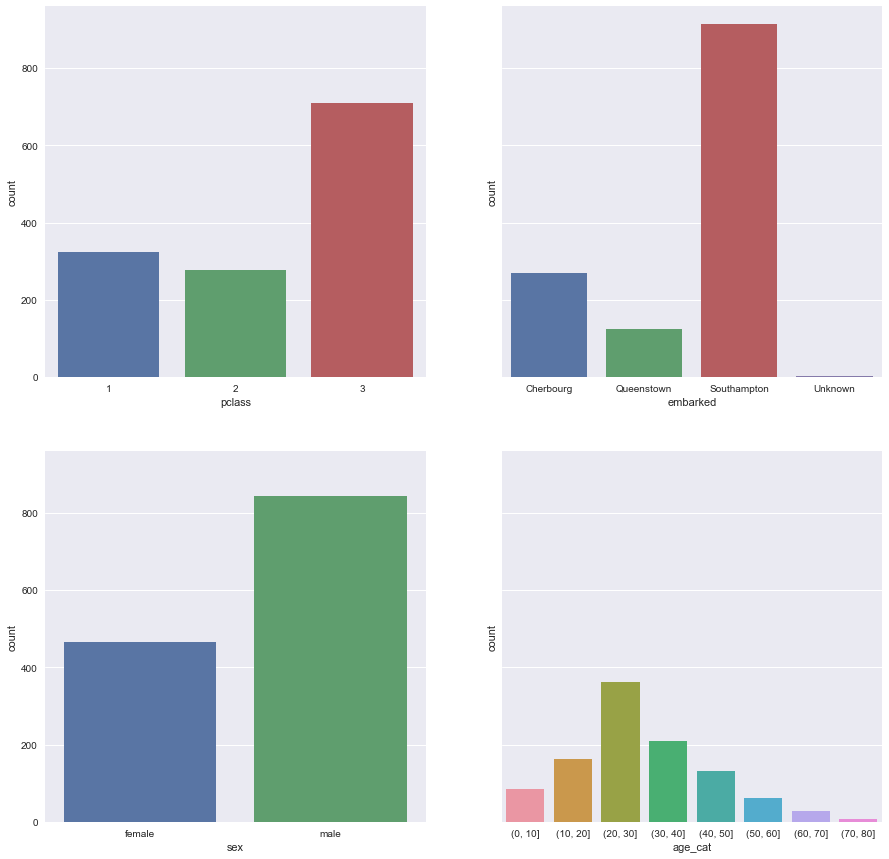

In [78]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharey=True, figsize=(15,15))

sns.countplot(x="pclass", data=passengers, ax=ax1);
sns.countplot(x='embarked', data=passengers, ax=ax2);
sns.countplot(x='sex', data=passengers, ax=ax3);

passengers["age_cat"] = pd.cut(passengers.age, range(0, np.ceil(passengers.age.max()).astype('int')+1, 10))
sns.countplot(x='age_cat', data=passengers, ax=ax4);

3) Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.

We point out that the data might not be a good way of computing this statistic. First, we recall that only 22% of passenger have the "cabin" feature populated. In some situation, it might not be enough to have a representative distribution. One could then rely on other columns to fill missing values, with the pclass being likely to help. But this could become non-trivial to do correctly, and would probably be more time-consuming than looking for this information in the schematics and assume the boat was undoubtedly at full capacity.

In our case, we therefor opted for a very simple approach using the cabin feature. We extract the unique letters from this fields as they represent the deck on which the cabin is. If there is no ambiguity on the letter (i.e. only one for a given passenger), it is chosen as the passenger's floor.

We show that this mapping enables to extract the *floor* attribute for 99.3 % of the passengers for whom the cabin value is known. This means we know the floor for 22 % of the population, for which we plot a pie chart.

Percentage of successully extracted floor feature (for non-null cabin): 99.3 %
Percentage of known floor values: 22.0 %


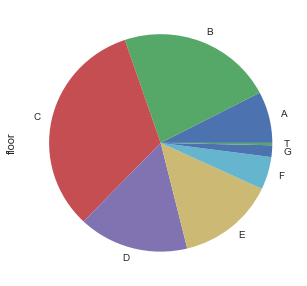

In [79]:
def get_floor(o):
    if type(o) != str:
        return np.NaN
    else:
        floor_codes = list(set([c for c in o if c.isalpha()]))
        return floor_codes[0] if len(floor_codes) == 1 else np.NaN

passengers['floor'] = passengers.cabin.transform(get_floor).astype('category', ordered=True)

nullfloor, nullcabin = passengers.floor.isnull().sum(),  passengers.cabin.isnull().sum()
print("Percentage of successully extracted floor feature (for non-null cabin): %2.1f %%" % ((1-(nullfloor-nullcabin)/nullcabin)*100) )
print("Percentage of known floor values: %2.1f %%" % ((len(passengers)-nullfloor)/len(passengers)*100) )

fig, axs = plt.subplots(figsize=(5,5))
passengers.floor.value_counts(sort=False).plot.pie();

In [80]:
pass_cabin_set = passengers[passengers.floor.notnull()]
pass_cabin_set.floor.map(ord).corr(pass_cabin_set.pclass)
passengers.survived.map({"Died":0, "Survived":1}).corr(passengers.pclass)

-0.31246936264967612

4) For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.

We rely on the *DataFrame.groupby* method to provide the three groups. As both the *pclass* and *survived* feature have a known value for every passenger, these results are representative. 

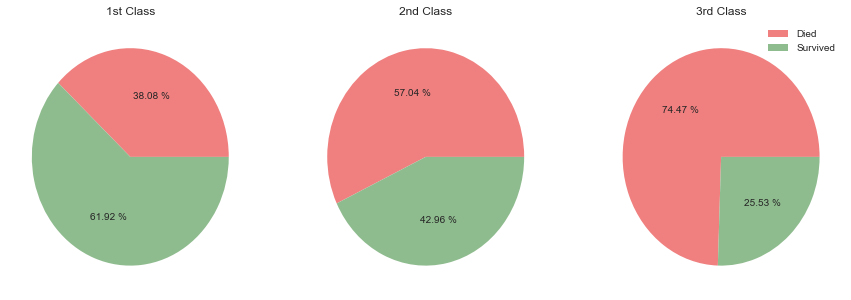

In [81]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))
colors = ['lightcoral','darkseagreen']
for (g, s), ax in zip(passengers.groupby(['pclass']).survived, axs):
    ax.set_title(["1st Class", "2nd Class", "3rd Class"][g-1])
    s.value_counts(sort=False).plot.pie(ax=ax, colors=colors, labels=['',''], autopct="%.2f %%")
    ax.set_ylabel("")
    if g == 3:
        ax.legend(labels = ['Died', 'Survived'])

5) Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.

Again, the *DataFrame.groupby* was convenient for this task as it enables to iterate over the groups. We then produce a a stacked bar plot showing the total counts (on the y-axis) by groups (on the x-axis). The survival/death distribution is represented by the colors.

We argue that this visualization is well suited for this statistic, because it shows both the survival ratio in every groups and their respective sizes.

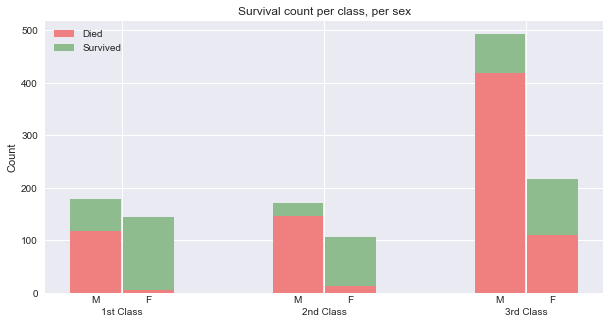

In [109]:
fig, ax = plt.subplots(figsize=(10,5))
width = 0.25
for i, (grp_lab, grp) in enumerate(passengers.groupby(["pclass", "sex"]).survived):
    shift = (grp_lab[1]=='female')*(width+0.01)
    down = plt.bar(grp_lab[0]+shift, grp.value_counts()[0], width, color=colors[0])
    up = plt.bar(grp_lab[0]+shift, grp.value_counts()[1], width, bottom=grp.value_counts()[0], color=colors[1])

# Using minor ticks to represent subgroups
ax.minorticks_on()

# Get location of the center of each rectangle, and location of the center of each group
min_ticks = [r.get_x()+r.get_width()/2 for i, r in enumerate(ax.patches) if i%2]
cols = iter(min_ticks)
maj_ticks = [(a+b)/2 for a, b in zip(cols, cols)]

# Sets the minor and major ticks 
ax.set_xticks(min_ticks, minor = True)
ax.set_xticks(maj_ticks)
new_ticks = ["F", "M", "F", "M", "F", "M"]
from matplotlib import ticker
ax.xaxis.set_minor_formatter(ticker.FixedFormatter(new_ticks))
ax.set_xticklabels(["1st Class", "2nd Class", "3rd Class"])
ax.tick_params(axis='x', which='major', pad=15)

ax.set_title('Survival count per class, per sex')
ax.set_ylabel('Count')
plt.legend(['Died', 'Survived'], loc='upper left');

6) Create 2 equally populated age categories and calculate survival proportions by age category, travel class and sex. Present your results in a DataFrame with unique index.

We use the *pd.qcut* function to cut the passenger population in two approximately equally sized groups. The delta between the two groups is 26, which is the number of values that fall exactly on the median age.

We display the result sorted with decreasing survival ratio because its funnier. :)

In [124]:
def ratio(s):
    return (s == "Survived").mean()

passengers['age_c_bin'] = pd.qcut(passengers.age, [0, 0.5, 1], labels=["Young", "Old"])

survival_ratio = passengers.pivot_table(index=['age_c_bin', 'pclass', 'sex'], values='survived', aggfunc=ratio)

survival_ratio.index.rename(["Age", "Class", "Gender"], inplace=True)
survival_ratio.rename(index=str, columns={"survived":"survival_rate"}, inplace=True)

print(passengers.age_c_bin.value_counts())
print("Index is unique:", survival_ratio.index.is_unique)

survival_ratio.sort_values('survival_rate', ascending=False)

Young    536
Old      510
Name: age_c_bin, dtype: int64
Index is unique: True


survival_rate
Age   Class Gender               
Old   1     female       0.967391
Young 1     female       0.951220
      2     female       0.910714
Old   2     female       0.872340
Young 1     male         0.531250
      3     female       0.513761
Old   3     female       0.372093
      1     male         0.302521
Young 2     male         0.216216
      3     male         0.183036
Old   3     male         0.144000
      2     male         0.083333